In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Weighted_mean_calculation_This_work_combined.out
DP_Leo_LTT_fit_weighted_data_Thiswork_K.ipynb
DP_Leo_LTT_fit_weighted_data_Thiswork_K_Res.jpg
DP_Leo_LTT_fit_weighted_data_Thiswork_Res.jpg
DP_Leo_LTT_fit_weighted_data_Thiswork_b.ipynb
DP_Leo_LTT_fit_weighted_data_Thiswork_b_Res.jpg
DP_Leo_LTT_fit_weighted_data_Thiswork_e.ipynb
DP_Leo_LTT_fit_weighted_data_Thiswork_e_Res.jpg
DP_Leo_LTT_fit_weighted_data_Thiswork_interporate.out
DP_Leo_LTT_fit_weighted_data_Thiswork_interporate_K100.out


In [3]:
#Read data ---#1
Input = "2022_Feb_week4_Weighted_mean_calculation_This_work_combined.out"
Data   = np.genfromtxt(Input)

BJD_time = Data[:,0]
OC = Data[:,1]
OC_err = Data[:,2]

In [4]:
#t = T0_bjd + P0_day*Epoch
x = BJD_time
y = OC
dy = OC_err

len_x = len(x)
#print(len_x)
#print(x)

In [5]:
m = 0
c = 0
K = 33.7        #m/s
e = 0               #No-unit
b = 0.0005
w = -1.36     #rad

In [6]:
def LTT_fit(x,m,c,K,e,b,w):
    return m*x + c + K*(1 - e*e)*np.sin(b*x - w)/(1 + e*np.cos(b*x))

In [7]:
import scipy.optimize as optimization  
guess = (m,c,K,e,b,w)
#guess = [41.9455, 0.39, 0.0005, -1.36]
params, params_covariance = optimization.curve_fit(LTT_fit, x, y,sigma=dy, absolute_sigma=True,p0=guess)

In [8]:
m = params[0]
c = params[1]
K = params[2]
e = params[3]
b = params[4]
w = params[5]

dm = params_covariance[0,0]
dc = params_covariance[1,1]
dK = params_covariance[2,2]
de = params_covariance[3,3]
db = params_covariance[4,4]
dw = params_covariance[5,5]

ocfit = LTT_fit(x,*params)

if e<0:
    w -= np.pi
    e *= -1
    w_deg = w*180/np.pi

In [9]:
print("The Keplerian parameters (K = 47 s):")
print("m =", m, "+/-", dm**0.5, "[s]")
print("c =", c, "+/-", dc**0.5, "[s]")
print("K =", K, "+/-", dK**0.5, "[s]")
print("e =", e, "+/-", de**0.5, "[days]")
print("b =", b, "+/-", db**0.5, "[rad]")
print("w =", w, "+/-", dw**0.5, "[rad]")
print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi), "[deg]")

#The period of the third body
P_d = 2*np.pi/b
dP_d = P_d*2*np.pi*db/(b**2)

#print("The orbital period of the third body (years):",P_d, '+/-', dP_d)
print("Pc =", P_d, "+/-", dP_d, "[days]")

P_yr = P_d/365.25
dP_yr = dP_d/365.25
#print("The orbital period of the third body (days):",P_yr, '+/-', dP_yr)
print("Pc_yr =", P_yr, "+/-", dP_yr, "[years]")

a_au = (P_yr**2)**(1./3)     # semi-major axis in au
da_au = np.sqrt((2*dP_d/(3*P_d))**2)*a_au
#print("Semi-major axis (AU):",a_au, '+/-', da_au)
print("Semi-major axis =", a_au, "+/-", da_au, "[AU]")

K_auyr = K*2.1096256684e-4      # K in au/yr

# compute planet mass and convert to Jupiter-mass units
mp = (2*np.pi)**(-1)*K_auyr*np.sqrt(1-e**2)*(P_yr)**(1/3)
mp_mjup = mp*1047.59421
dmp_mjup = mp_mjup * np.sqrt((dK/K)**2 + (dP_d/(3*P_d))**2 + (e*de/np.sqrt(1-e*e))**2 )

print ('Mass sin(i)Mp=', mp_mjup ,'+/-', dmp_mjup, "[MJ]")

The Keplerian parameters (K = 47 s):
m = 0.0006148077754996115 +/- 0.0004398518117357549 [s]
c = -39.27836968250542 +/- 19.735804363980765 [s]
K = 47.01369192315678 +/- 1.182379833905439 [s]
e = 0.13525377052641724 +/- 0.07845789520501215 [days]
b = 0.0005111664682947285 +/- 1.5420755195245228e-05 [rad]
w = -5.919757329295307 +/- 0.7455696722034713 [rad]
w_deg = -339.177110710257 +/- 42.71799555021115 [deg]
Pc = 12291.85734373489 +/- 70.28844753146117 [days]
Pc_yr = 33.653271303860066 +/- 0.19243928140030436 [years]
Semi-major axis = 10.423610894628863 +/- 0.03973684404599882 [AU]
Mass sin(i)Mp= 5.289844305623588 +/- 0.1576868787554597 [MJ]


In [10]:
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
y_line = LTT_fit(x_line, *params) #### For all interporation 
#print(x_line)
print(ocfit)
#print(ocfit)
#print(x)

#Reduced_chisqrt
m = 6
dof = len_x - m
Chi_sqr = ((y - ocfit)**2/(dy)**2)/dof
Reduced_chisq = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq)

[ -1.95878988  14.24895205  29.01263133  32.10979527  23.62593969
  19.18033847  10.51003788 -47.70245027 -50.50008509 -27.31987744
 -26.92082105 -26.37317709 -25.83564317 -23.22259063 -22.75641543
 -21.80333875 -21.07279305 -18.18480292  10.00752923  18.11863342
  30.35575739  31.42301298  31.42301298  41.70055985  44.42254774]
Reduced_chisq: 0.8097322295532281


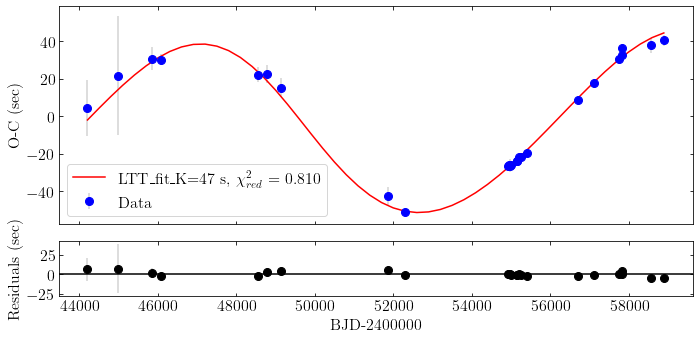

In [11]:
N_BMJD = 2400000
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('BJD-'+str(N_BMJD))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
ax0.plot(x_line, y_line, '-', color='red',label='LTT\_fit\_K=47 s, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))

ax0.set_ylabel('O-C (sec)')
ax0.legend(loc="best")

Residual = y-ocfit

ax1.set_ylabel('Residuals (sec)')
ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
#ax1.legend(loc="best")
#plt.savefig("DP_Leo_LTT_fit_weighted_data_Thiswork_K_Res.jpg", dpi=1000)
plt.show()

#### The changing parameters: K = 100

In [12]:
m = 0
c = 0
K = 100        #m/s
e = 0               #No-unit
b = 0.0005
w = -1.36     #rad

In [13]:
def LTT_fit_K100(x,m,c,e,b,w):
    return m*x + c + K*(1 - e*e)*np.sin(b*x - w)/(1 + e*np.cos(b*x))

In [14]:
import scipy.optimize as optimization  
guess = (m,c,e,b,w)
#guess = [41.9455, 0.39, 0.0005, -1.36]
params_K100, params_covariance_K100 = optimization.curve_fit(LTT_fit_K100, x, y,sigma=dy, absolute_sigma=True,p0=guess)

In [15]:
m = params_K100[0]
c = params_K100[1]
e = params_K100[2]
b = params_K100[3]
w = params_K100[4]

dm = params_covariance_K100[0,0]
dc = params_covariance_K100[1,1]
de = params_covariance_K100[2,2]
db = params_covariance_K100[3,3]
dw = params_covariance_K100[4,4]

ocfit = LTT_fit_K100(x,*params_K100)

if e<0:
    w -= np.pi
    e *= -1
    w_deg = w*180/np.pi

In [16]:
print("The Keplerian parameters (K = 100 s):")
print("m =", m, "+/-", dm**0.5, "[s]")
print("c =", c, "+/-", dc**0.5, "[s]")
print("e =", e, "+/-", de**0.5, "[days]")
print("b =", b, "+/-", db**0.5, "[rad]")
print("w =", w, "+/-", dw**0.5, "[rad]")
print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi), "[deg]")

#The period of the third body
P_d = 2*np.pi/b
dP_d = P_d*2*np.pi*db/(b**2)

#print("The orbital period of the third body (years):",P_d, '+/-', dP_d)
print("Pc =", P_d, "+/-", dP_d, "[days]")

P_yr = P_d/365.25
dP_yr = dP_d/365.25
#print("The orbital period of the third body (days):",P_yr, '+/-', dP_yr)
print("Pc_yr =", P_yr, "+/-", dP_yr, "[years]")

a_au = (P_yr**2)**(1./3)     # semi-major axis in au
da_au = np.sqrt((2*dP_d/(3*P_d))**2)*a_au
#print("Semi-major axis (AU):",a_au, '+/-', da_au)
print("Semi-major axis =", a_au, "+/-", da_au, "[AU]")

K_auyr = K*2.1096256684e-4      # K in au/yr

# compute planet mass and convert to Jupiter-mass units
mp = (2*np.pi)**(-1)*K_auyr*np.sqrt(1-e**2)*(P_yr)**(1/3)
mp_mjup = mp*1047.59421
dmp_mjup = mp_mjup * np.sqrt((dK/K)**2 + (dP_d/(3*P_d))**2 + (e*de/np.sqrt(1-e*e))**2 )

print ('Mass sin(i)Mp=', mp_mjup ,'+/-', dmp_mjup, "[MJ]")

The Keplerian parameters (K = 100 s):
m = 0.007915512347856445 +/- 0.00045695244917458804 [s]
c = -371.9242082484452 +/- 24.19670492670179 [s]
e = 0.7829361112577612 +/- 0.02222331035066085 [days]
b = 0.00018339424481396885 +/- 5.854397114248052e-07 [rad]
w = -19.264730503305717 +/- 0.02452963312998131 [rad]
w_deg = -1103.7877512963557 +/- 1.4054444513522084 [deg]
Pc = 34260.53698442453 +/- 2.1936482229699767 [days]
Pc_yr = 93.80023815037516 +/- 0.006005881513949286 [years]
Semi-major axis = 20.644417212516906 +/- 0.0008812196795217898 [AU]
Mass sin(i)Mp= 9.942179869790989 +/- 0.13913133613331968 [MJ]


In [17]:
x_min, x_max = np.amin(x), np.amax(x)
x_line_K100 = np.linspace(x_min, x_max)
y_line_K100 = LTT_fit_K100(x_line_K100, *params_K100) #### For all interporation 
#print(x_line)
print(ocfit)
#print(ocfit)
#print(x)

#Reduced_chisqrt
m = 5
dof = len_x - m
Chi_sqr = ((y - ocfit)**2/(dy)**2)/dof
Reduced_chisq_K100 = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq_K100)

[ 15.8502735   22.40356431  28.24752007  29.49789896  24.99062066
  22.34534865  16.65187431 -46.13581786 -51.13940386 -27.26152027
 -26.8413285  -26.26626771 -25.70359274 -22.99265505 -22.51314378
 -21.53656449 -20.79136136 -17.87277206   9.13124605  16.83164104
  29.22797848  30.40358614  30.40358614  43.96925141  49.57803793]
Reduced_chisq: 1.3220233378074884


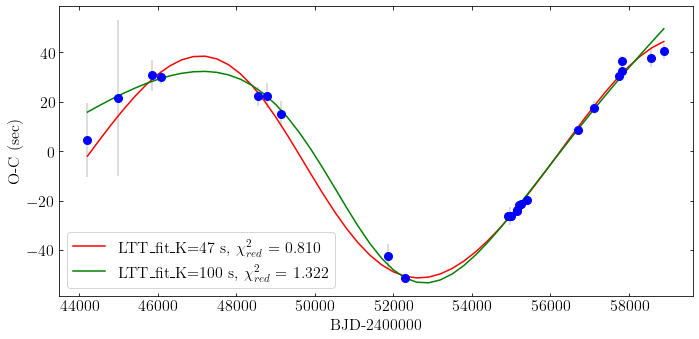

In [18]:
N_BMJD = 2400000
#print(phase)
#fig,ax = plt.subplots()
fig=plt.figure(figsize=(10, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#plt.errorbar(x,y,dy,fmt='ok')
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
plt.plot(x_line,y_line,'-r',label='LTT\_fit\_K=47 s, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))
plt.plot(x_line_K100,y_line_K100,'-g',label='LTT\_fit\_K=100 s, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_K100)))
#plt.title('phased RV data for 51 Peg b')
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.legend(loc="best")
plt.show()

#### The changing parameters: K = 150

In [19]:
m = 0
c = 0
K = 150        #m/s
e = 0               #No-unit
b = 0.0005
w = -1.36     #rad

In [20]:
def LTT_fit_K150(x,m, c,e,b,w):
    return m*x + c + K*(1 - e*e)*np.sin(b*x - w)/(1 + e*np.cos(b*x))

In [21]:
import scipy.optimize as optimization  
guess = (m,c,e,b,w)
params_K150, params_covariance_K150 = optimization.curve_fit(LTT_fit_K150, x, y,sigma=dy, absolute_sigma=True,p0=guess)

In [22]:
m = params_K150[0]
c = params_K150[1]
e = params_K150[2]
b = params_K150[3]
w = params_K150[4]

dm = params_covariance_K150[0,0]
dc = params_covariance_K150[1,1]
de = params_covariance_K150[2,2]
db = params_covariance_K150[3,3]
dw = params_covariance_K150[4,4]

ocfit = LTT_fit_K150(x,*params_K150)

if e<0:
    w -= np.pi
    e *= -1
    w_deg = w*180/np.pi

In [23]:
print("The Keplerian parameters (K = 150 s):")
print("m =", m, "+/-", dm**0.5, "[s]")
print("c =", c, "+/-", dc**0.5, "[s]")
print("e =", e, "+/-", de**0.5, "[days]")
print("b =", b, "+/-", db**0.5, "[rad]")
print("w =", w, "+/-", dw**0.5, "[rad]")
print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi), "[deg]")

#The period of the third body
P_d = 2*np.pi/b
dP_d = P_d*2*np.pi*db/(b**2)

#print("The orbital period of the third body (years):",P_d, '+/-', dP_d)
print("Pc =", P_d, "+/-", dP_d, "[days]")

P_yr = P_d/365.25
dP_yr = dP_d/365.25
#print("The orbital period of the third body (days):",P_yr, '+/-', dP_yr)
print("Pc_yr =", P_yr, "+/-", dP_yr, "[years]")

a_au = (P_yr**2)**(1./3)     # semi-major axis in au
da_au = np.sqrt((2*dP_d/(3*P_d))**2)*a_au
#print("Semi-major axis (AU):",a_au, '+/-', da_au)
print("Semi-major axis =", a_au, "+/-", da_au, "[AU]")

K_auyr = K*2.1096256684e-4      # K in au/yr

# compute planet mass and convert to Jupiter-mass units
mp = (2*np.pi)**(-1)*K_auyr*np.sqrt(1-e**2)*(P_yr)**(1/3)
mp_mjup = mp*1047.59421
dmp_mjup = mp_mjup * np.sqrt((dK/K)**2 + (dP_d/(3*P_d))**2 + (e*de/np.sqrt(1-e*e))**2 )

print ('Mass sin(i)Mp=', mp_mjup ,'+/-', dmp_mjup, "[MJ]")

The Keplerian parameters (K = 150 s):
m = 0.01914452045503608 +/- 0.0011747283461635582 [s]
c = -1020.8228224163306 +/- 69.73463079876085 [s]
e = 0.7360117481087977 +/- 0.016133472096952397 [days]
b = 0.00019540532574151504 +/- 1.1963143439812196e-06 [rad]
w = -18.286773819992135 +/- 0.11522332244585473 [rad]
w_deg = -1047.7549607958756 +/- 6.601810077622482 [deg]
Pc = 32154.626714171925 +/- 7.572532889066483 [days]
Pc_yr = 88.0345700593345 +/- 0.020732465130914396 [years]
Semi-major axis = 19.78953084400199 +/- 0.0031070048800442627 [AU]
Mass sin(i)Mp= 15.888988851949387 +/- 0.14816121197152668 [MJ]


In [24]:
x_min, x_max = np.amin(x), np.amax(x)
x_line_K150 = np.linspace(x_min, x_max)
y_line_K150 = LTT_fit_K150(x_line_K150, *params_K150) #### For all interporation 
#print(x_line)
print(ocfit)
#print(ocfit)
#print(x)

#Reduced_chisqrt
m = 5
dof = len_x - m
Chi_sqr = ((y - ocfit)**2/(dy)**2)/dof
Reduced_chisq_K150 = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq_K150)

[-34.49983704  -2.10173045  28.99072595  35.93237284  32.65035512
  26.04572945  13.5818817  -50.73939182 -52.18813839 -27.03364374
 -26.67068185 -26.17303972 -25.68507271 -23.31860074 -22.89719286
 -22.03616915 -21.37656894 -18.77067758   7.45892444  15.76739627
  30.02968012  31.44166546  31.44166546  48.51444765  56.00383401]
Reduced_chisq: 3.2703125876306887


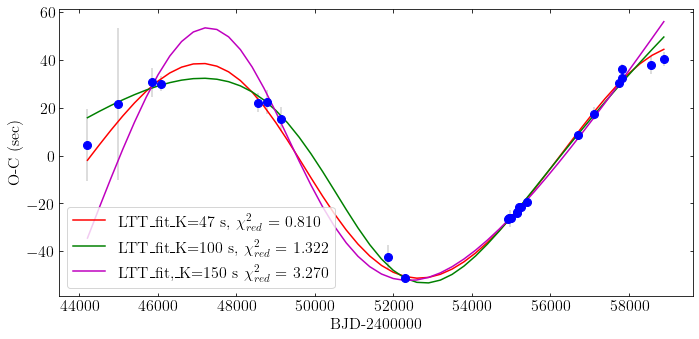

In [25]:
N_BMJD = 2400000
#print(phase)
#fig,ax = plt.subplots()
fig=plt.figure(figsize=(10, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#plt.errorbar(x,y,dy,fmt='ok')
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
plt.plot(x_line,y_line,'-r',label='LTT\_fit\_K=47 s, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))
plt.plot(x_line_K100,y_line_K100,'-g',label='LTT\_fit\_K=100 s, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_K100)))
plt.plot(x_line_K150,y_line_K150,'-m',label='LTT\_fit,\_K=150 s $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_K150)))
#plt.title('phased RV data for 51 Peg b')
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.legend(loc="best")
plt.show()

#### The changing parameters: K = 200

In [26]:
m = 0
c = 0
K = 200        #m/s
e = 0               #No-unit
b = 0.0005
w = -1.36     #rad

In [27]:
def LTT_fit_K200(x,m, c,e,b,w):
    return m*x + c + K*(1 - e*e)*np.sin(b*x - w)/(1 + e*np.cos(b*x))

In [28]:
import scipy.optimize as optimization  
guess = (m,c,e,b,w)
params_K200, params_covariance_K200 = optimization.curve_fit(LTT_fit_K200, x, y,sigma=dy, absolute_sigma=True,p0=guess)

In [29]:
m = params_K200[0]
c = params_K200[1]
e = params_K200[2]
b = params_K200[3]
w = params_K200[4]

dm = params_covariance_K200[0,0]
dc = params_covariance_K200[1,1]
de = params_covariance_K200[2,2]
db = params_covariance_K200[3,3]
dw = params_covariance_K200[4,4]

ocfit = LTT_fit_K200(x,*params_K200)

if e<0:
    w -= np.pi
    e *= -1
    w_deg = w*180/np.pi

In [30]:
print("The Keplerian parameters (K = 200 s):")
print("m =", m, "+/-", dm**0.5, "[s]")
print("c =", c, "+/-", dc**0.5, "[s]")
print("e =", e, "+/-", de**0.5, "[days]")
print("b =", b, "+/-", db**0.5, "[rad]")
print("w =", w, "+/-", dw**0.5, "[rad]")
print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi), "[deg]")

#The period of the third body
P_d = 2*np.pi/b
dP_d = P_d*2*np.pi*db/(b**2)

#print("The orbital period of the third body (years):",P_d, '+/-', dP_d)
print("Pc =", P_d, "+/-", dP_d, "[days]")

P_yr = P_d/365.25
dP_yr = dP_d/365.25
#print("The orbital period of the third body (days):",P_yr, '+/-', dP_yr)
print("Pc_yr =", P_yr, "+/-", dP_yr, "[years]")

a_au = (P_yr**2)**(1./3)     # semi-major axis in au
da_au = np.sqrt((2*dP_d/(3*P_d))**2)*a_au
#print("Semi-major axis (AU):",a_au, '+/-', da_au)
print("Semi-major axis =", a_au, "+/-", da_au, "[AU]")

K_auyr = K*2.1096256684e-4      # K in au/yr

# compute planet mass and convert to Jupiter-mass units
mp = (2*np.pi)**(-1)*K_auyr*np.sqrt(1-e**2)*(P_yr)**(1/3)
mp_mjup = mp*1047.59421
dmp_mjup = mp_mjup * np.sqrt((dK/K)**2 + (dP_d/(3*P_d))**2 + (e*de/np.sqrt(1-e*e))**2 )

print ('Mass sin(i)Mp=', mp_mjup ,'+/-', dmp_mjup, "[MJ]")

The Keplerian parameters (K = 200 s):
m = 0.03224215059224802 +/- 0.0003283272327638347 [s]
c = -1776.4780167551266 +/- 14.543389514166432 [s]
e = 0.6479832289207261 +/- 0.025271379387116977 [days]
b = 0.0002055496113563553 +/- 4.3892618250406586e-07 [rad]
w = -17.206462299207505 +/- 0.053944930186912154 [rad]
w_deg = -985.8576700955567 +/- 3.0908168258379374 [deg]
Pc = 30567.731389608973 +/- 0.8757753808575159 [days]
Pc_yr = 83.68988744588357 +/- 0.002397742315831666 [years]
Semi-major axis = 19.132952318025477 +/- 0.0003654435105586203 [AU]
Mass sin(i)Mp= 23.43676598706099 +/- 0.16431988033396222 [MJ]


In [31]:
x_min, x_max = np.amin(x), np.amax(x)
x_line_K200 = np.linspace(x_min, x_max)
y_line_K200 = LTT_fit_K200(x_line_K200, *params_K200) #### For all interporation 
#print(x_line)
print(ocfit)
#print(ocfit)
#print(x)

#Reduced_chisqrt
m = 5
dof = len_x - m
Chi_sqr = ((y - ocfit)**2/(dy)**2)/dof
Reduced_chisq_K200 = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq_K200)

[-76.76207369 -15.20651531  30.60463277  38.25910707  17.42041455
  11.38237047   0.96430723 -45.9115952  -47.19009584 -27.15545444
 -26.83259825 -26.38893136 -25.95276296 -23.82196968 -23.43987872
 -22.65674394 -22.05461403 -19.65749974   5.91912537  14.50901957
  29.73800001  31.27730986  31.27730986  50.31423527  58.90258322]
Reduced_chisq: 6.33709315839536


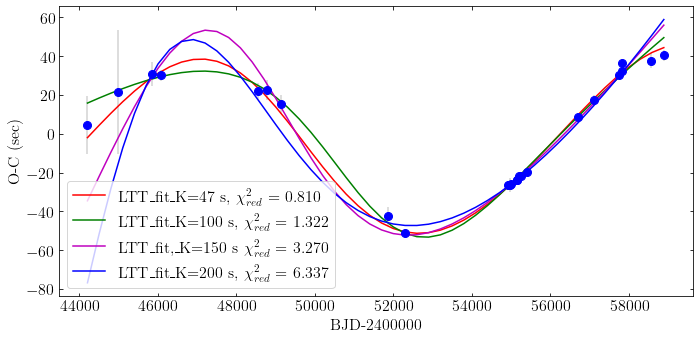

In [32]:
N_BMJD = 2400000
#print(phase)
#fig,ax = plt.subplots()
fig=plt.figure(figsize=(10, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#plt.errorbar(x,y,dy,fmt='ok')
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
plt.plot(x_line,y_line,'-r',label='LTT\_fit\_K=47 s, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))
plt.plot(x_line_K100,y_line_K100,'-g',label='LTT\_fit\_K=100 s, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_K100)))
plt.plot(x_line_K150,y_line_K150,'-m',label='LTT\_fit,\_K=150 s $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_K150)))
plt.plot(x_line_K200,y_line_K200,'-b',label='LTT\_fit\_K=200 s, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_K200)))
#plt.title('phased RV data for 51 Peg b')
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.legend(loc="best")
plt.savefig("DP_Leo_LTT_fit_weighted_data_Thiswork_K_Res.jpg", dpi=1000)
plt.show()